# Trim your csv's to the desire 

-Author: Jerry Wu  

-Last Modified: 1/30/23   

-Description: This jupyter notebook allows the
 user to run through a sequence of 
.csv's and trim them to the relevant time frame, 
and save the trimmed files into a folder

# Step 1: Set up

### Step 1a: Import Packages

In [1]:
import sys


### Please append the SMA folder that contains DORA 
sys.path.append(r'C:\Users\jerry\Desktop\Research\Kosuri\Rotor_Data_Interpretation\Jerry_Time_to_shine\DORA_Visualization-main\OMMxDORA-main\OMMxDORA-main\sma') #if you are not amanda, change to your sma file path (found in zipfile downloaded from github)


import DORA

import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import itertools

### Step 1b: Run background function necessary for .csv trimmer

In [2]:
def find_center_hist_max(x, y,bin_num):
            # find the center of a plot using a low resolution histogram. Find the max value of that histogram. The corresponding x and y indicies become those of the center make the center
            H, xedges , yedges = np.histogram2d(x,y, bins = bin_num)

            #find the x and y index of the maximum value histogram 
            indMax = np.unravel_index(H.argmax(),H.shape)

            #Set the value of the max x and y indexes to be the new OR(OverRidden) center
            center_OR = [xedges[indMax[0]],yedges[indMax[1]]]

            plt.hist2d(x,y,bins = bin_num, cmap = "viridis")
            plt.scatter(x = center_OR[0], y= center_OR[1], color = "magenta")
            plt.text(x= center_OR [0] + 0.02, y= center_OR[1] + 0.02, s='CENTER')

            # Add title and axis names
            plt.title('2D Histogram of Centered Data')
            plt.xlabel('X pixels')
            plt.ylabel('Y pixels')
            plt.show()
            
            #return the center found
            return center_OR


### Step 3a: Input Parameters for DORA Analysis

### Key parameters every user should update:

folder_name -- name of fold with all csv's to analyze

In [3]:
#UNIVERSAL PARAMETERS
#get the name of your folder as a string and put r in front 
folder_name = r"C:\Users\jerry\Desktop\Research\Kosuri\Rotor_Data_Interpretation\Jerry_Time_to_shine\DORA_Visualization-main\OMMxDORA-main\OMMxDORA-main\OrbitBiotin500Hz100Lz_1ktrcsv\OrbitBiotin500Hz100Lz_1ktrcsv\Seven_clean_dots\OG_Data"
# file_name = "26_laser_10_glycerol_00016.csv"
pixel_size = 154  # in nanometers (or nm per pixel or nm/px )
time_step = 20  # miliseconds per frame in trajectory movie
frame_start = 0  # enter 0 to start from beginning of dataset #ARBITRARILY SET TO 0 AND -1
frame_end = -1  # enter -1 to end at the last value of the data set
cmap = "spring" # enter a color map string from this https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
exp_tag = "OrbitBiotin500Hz100Lz_1ktrcsv" # a tag that caries the name of the experiment
first_zero_end = 'no'  # yes to cut off all values after first 0,0 = x,y
graph_centers = "yes" #'yes' or 'no' to graphing the centers of the data. 
save_plot = 'yes' 

exp_title = "Orbit_Biotin_500Hz_100Lz"
analysisName='Null'

# file_name = csvnum   #Jerry Gets rid of old file title
file_name = '00035.csv' # THIS IS AN OBSOLETE INPUT THAT GETS OVER RUN, DO NOT WORRY ABOUT THIS FIELD
pk = os.path.splitext(file_name)[0]


#universal parameters
exp_tag = exp_title + pk # a tag that caries the name of the experiment


# pixel_size = 117  # in nanometers
time_step = 2  # miliseconds per frame in trajectory movie
# frame_start = 4000  # enter 0 to start from beginning of dataset
# frame_end = 4500 #
frame_start = 0  # enter 0 to start from beginning of dataset
frame_end = -1
# frame_start = 3500  # enter 0 to start from beginning of dataset
# frame_end = 4000
 # enter -1 to end at the last value of the data set
cmap = "spring_r" # enter a color map string from this https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
first_zero_end = 'no'  # yes to cut off all values after first 0,0 = x,y
graph_centers = "yes" #'yes' or 'no' to graphing the centers of the data. 
save_plot = 'yes' 

#downsampling parameters
bin_size = 20  # bin size for downsample/filter processing
processing = "none"  # enter downsample, moving average, or none

#Plot Parameters

#Which Graph?
plot_type = "grid"
#plot_type = "2D"
#Graphing options:
    # Grid plot
        #grid: a grid of little snippets of the data

##### Trajectory Maps Parameters:

# "yes" enables center display of center coordinates if 2D or Find err angle
display_center = "no"

#Labels
x_axis_label = "x (nm)"
y_axis_label = "y (nm)"
z_axis_label = "Time (ms)"  
unit = "nm"  # enter pixel or nm

#Formatting parameters
pixel_min = -0.75  # setting min/max axis range (pixel)
pixel_max = 0.75

# change axis increments for nicely fitting tick marks (pixel)
axis_increment_pixel = 7
# change axis increments for nicely fitting tick marks (nm)
axis_increment_nm = 7
nm_min = -150  # setting min/max axis range (nm)
nm_max = 150
#Do you want to save your plot?
save_plot = 'no'

#########Angle Versus Time (AVT or avt) Graphs

#Formatting parameters 'grid' plot  ##################################FORMATTING SETTINGS FOR GRID
frames_per_plot = 500  # refers to grid plot
columns = 7  # columns of plots (grid plot)
fig_size_x = 40 # adjust display parameters for graphs to fit nicely, mostly used for 'grid' plot
fig_size_y  = 40 # adjust display parameters for graphs to fit nicely, mostly used for 'grid' plot

#Formatting parameters 'animation' plot
frame_speed = 20  # for animation only (ms)
tail_length = 50  # for animation only

#DORA.table parameters: 
save_table = 'no' #saves filtered table if "yes"

#DORA.Caldera parameters:
donut_width = 15

#DORA.collect_variable parameter package
###DataTable = avt_good cannot have bc it has not been defined yet
col = "Delta Angle"
sample_conditions= analysisName
name_saving_folder = "Data Tables"

### Step 2: Run for loop 

Items to do in run for loop:

1. CPU generates two intial graphs of peak over all frames from center algorithm from Claire and Jerry, respectively. 
2. CPU generates a GRID graph of the peak for every X frames (500 default)
3. Input a start frame and end frame of the timeframe you would like to perserve! 

How would you like your output?

Directory  trimmed_csv  already exists


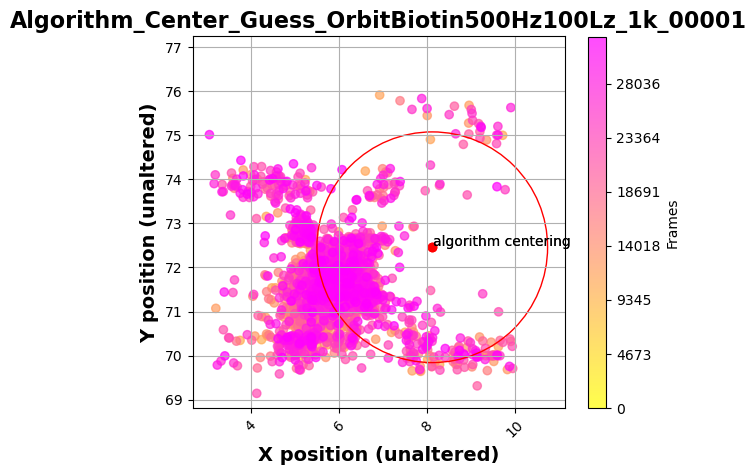

The center is (8.118950172346464, 72.45953805106026)
If the center is satisfactory, change the find_center_coordinates parameter to no
If the center is unsatisfactory, adjust the frame_start and frame_end parameters and try again


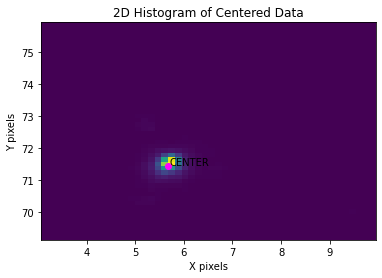

number of plots: 42


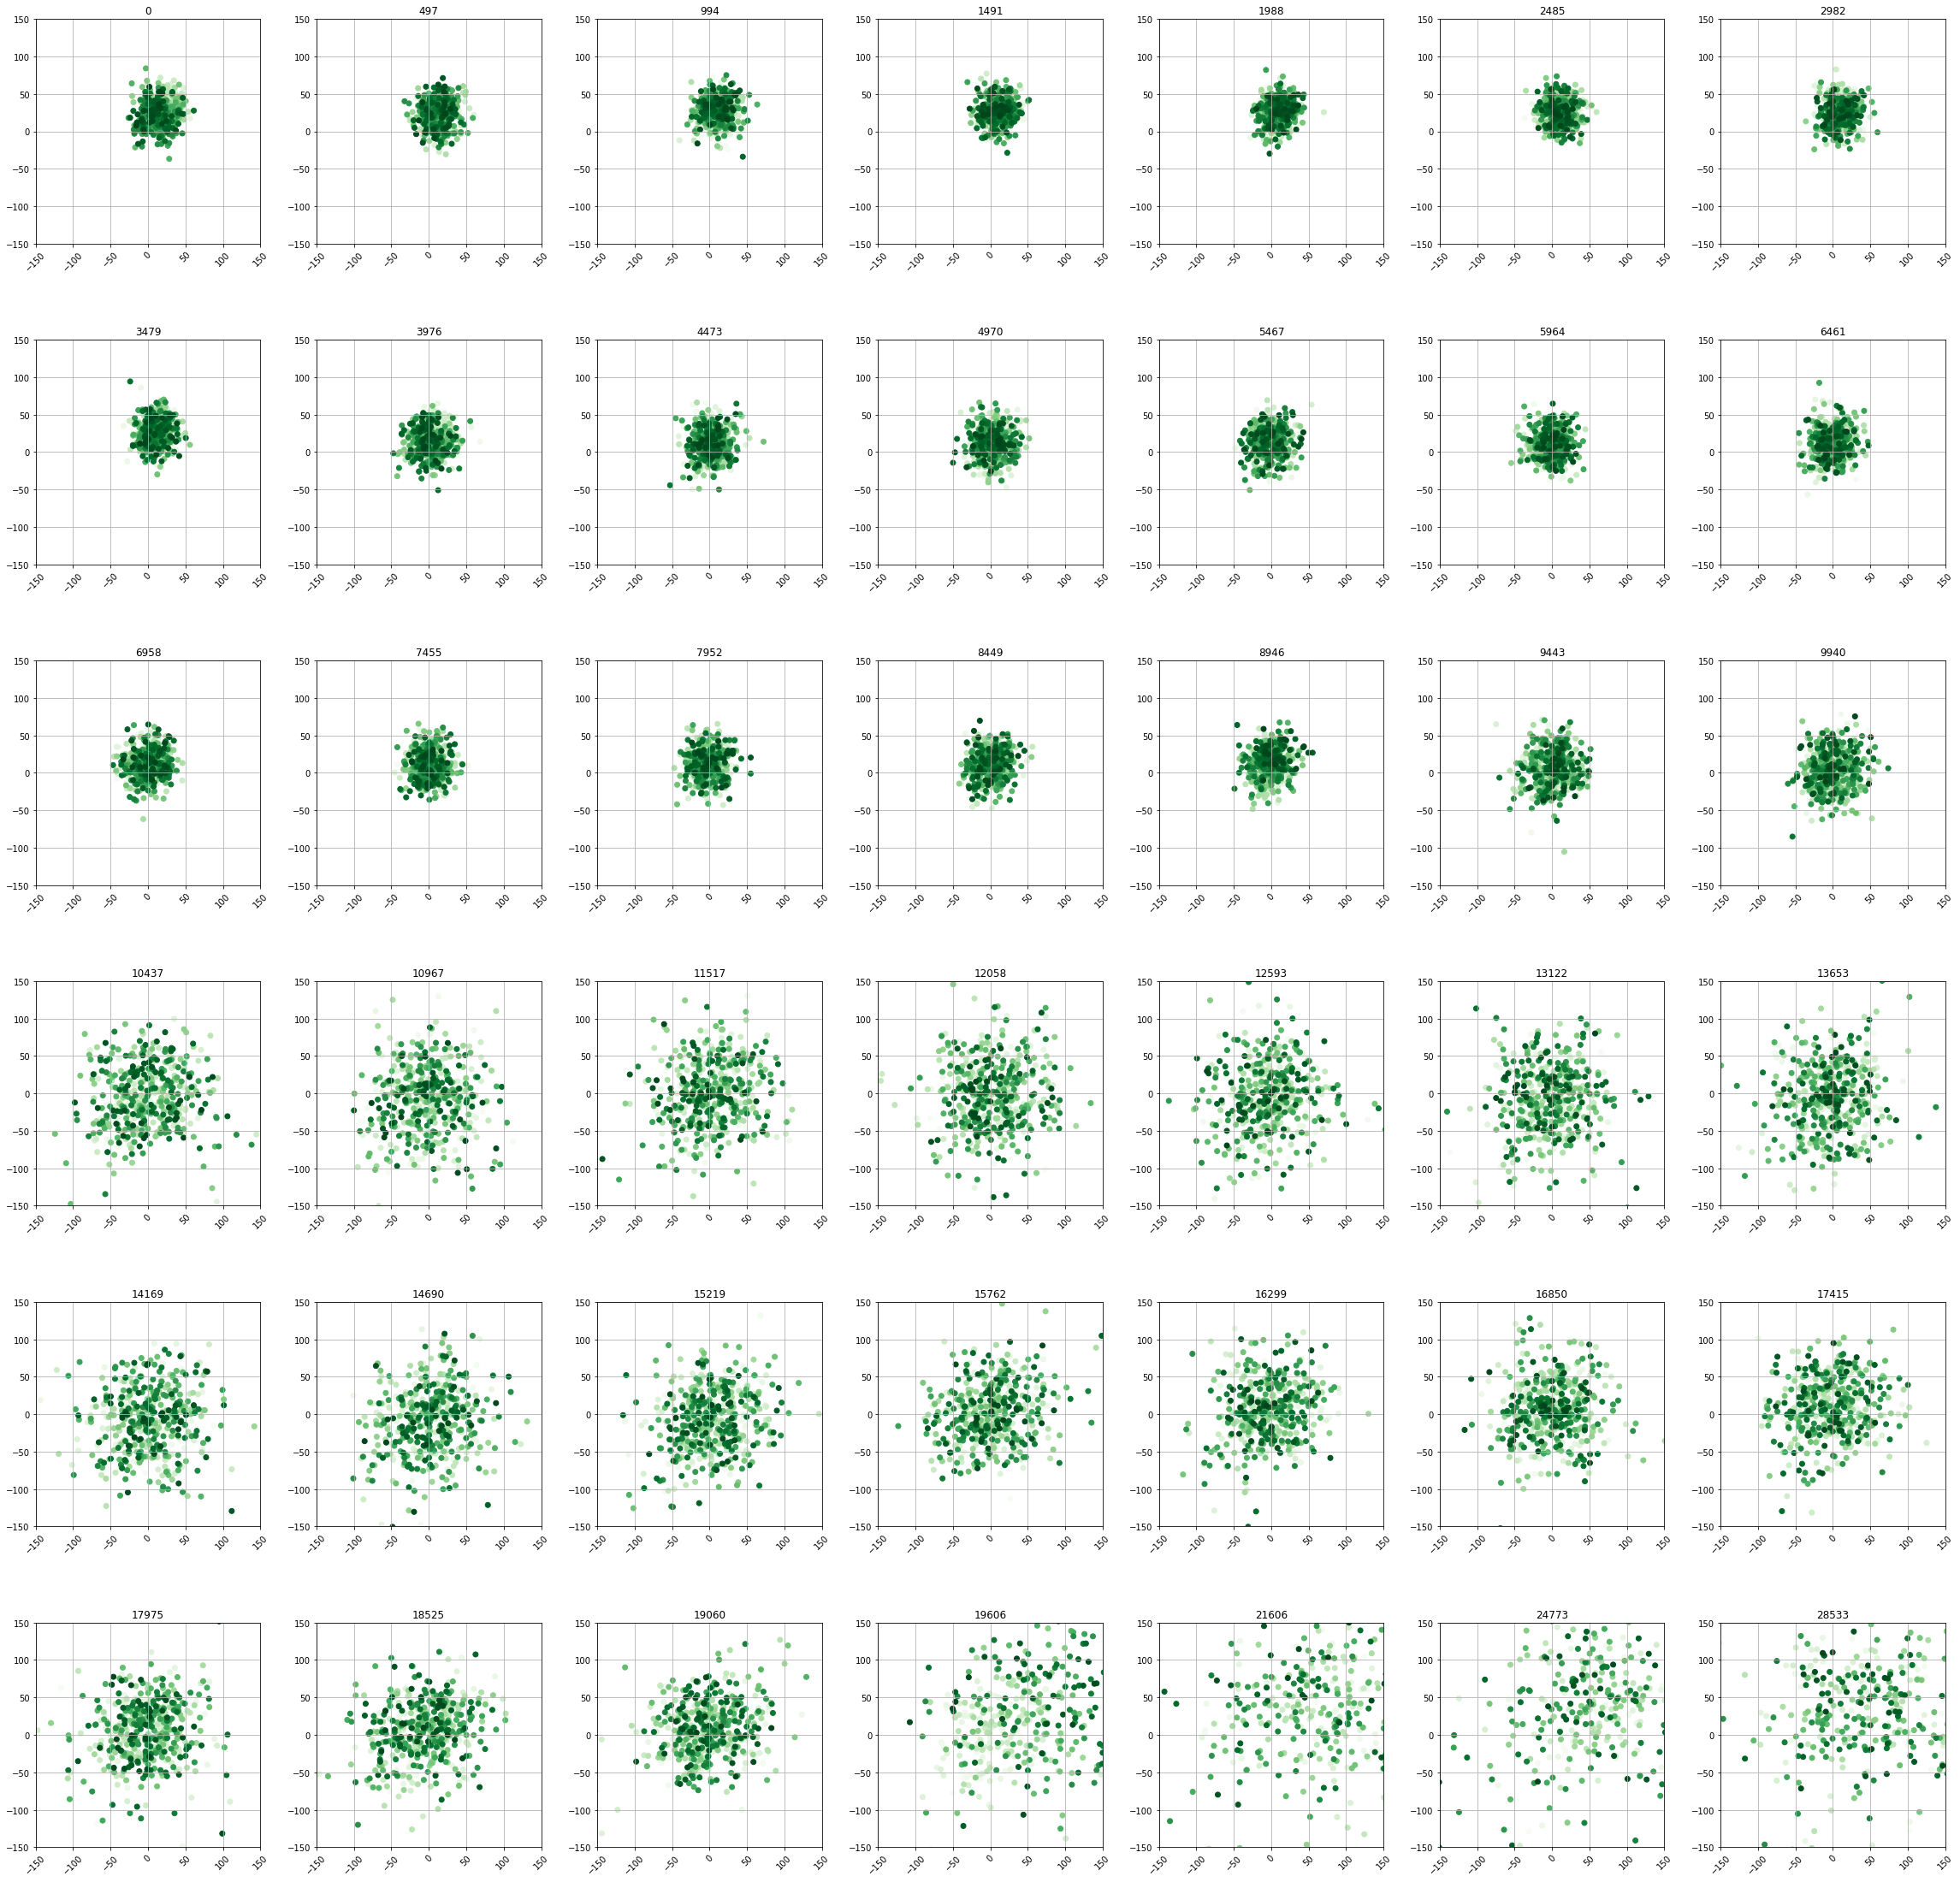

Selected Range: 0 to 1000 
Selected Index Range: 0 to 1000 
I have saved which folders have passed as datatable OrbitBiotin500Hz100Lz_1k_00001_trimmed.csv 
and I have stored them here: trimmed_csv


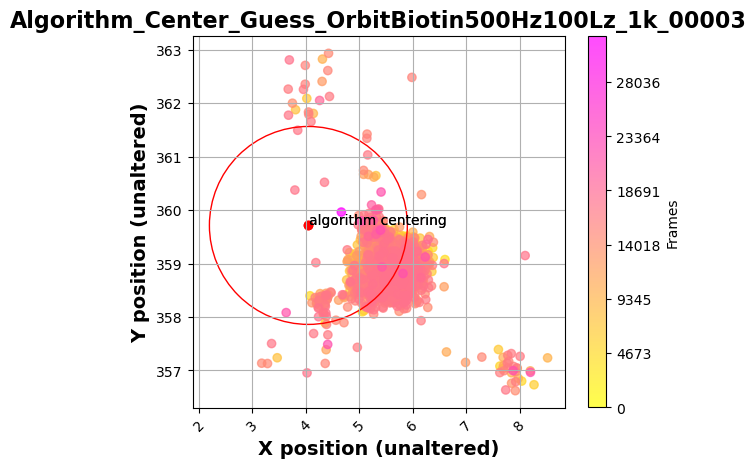

The center is (4.049572628371569, 359.7129099320392)
If the center is satisfactory, change the find_center_coordinates parameter to no
If the center is unsatisfactory, adjust the frame_start and frame_end parameters and try again


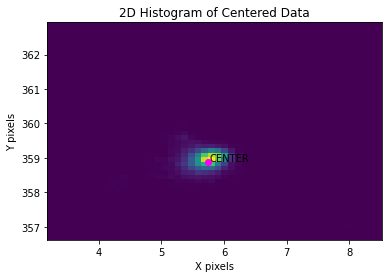

number of plots: 23


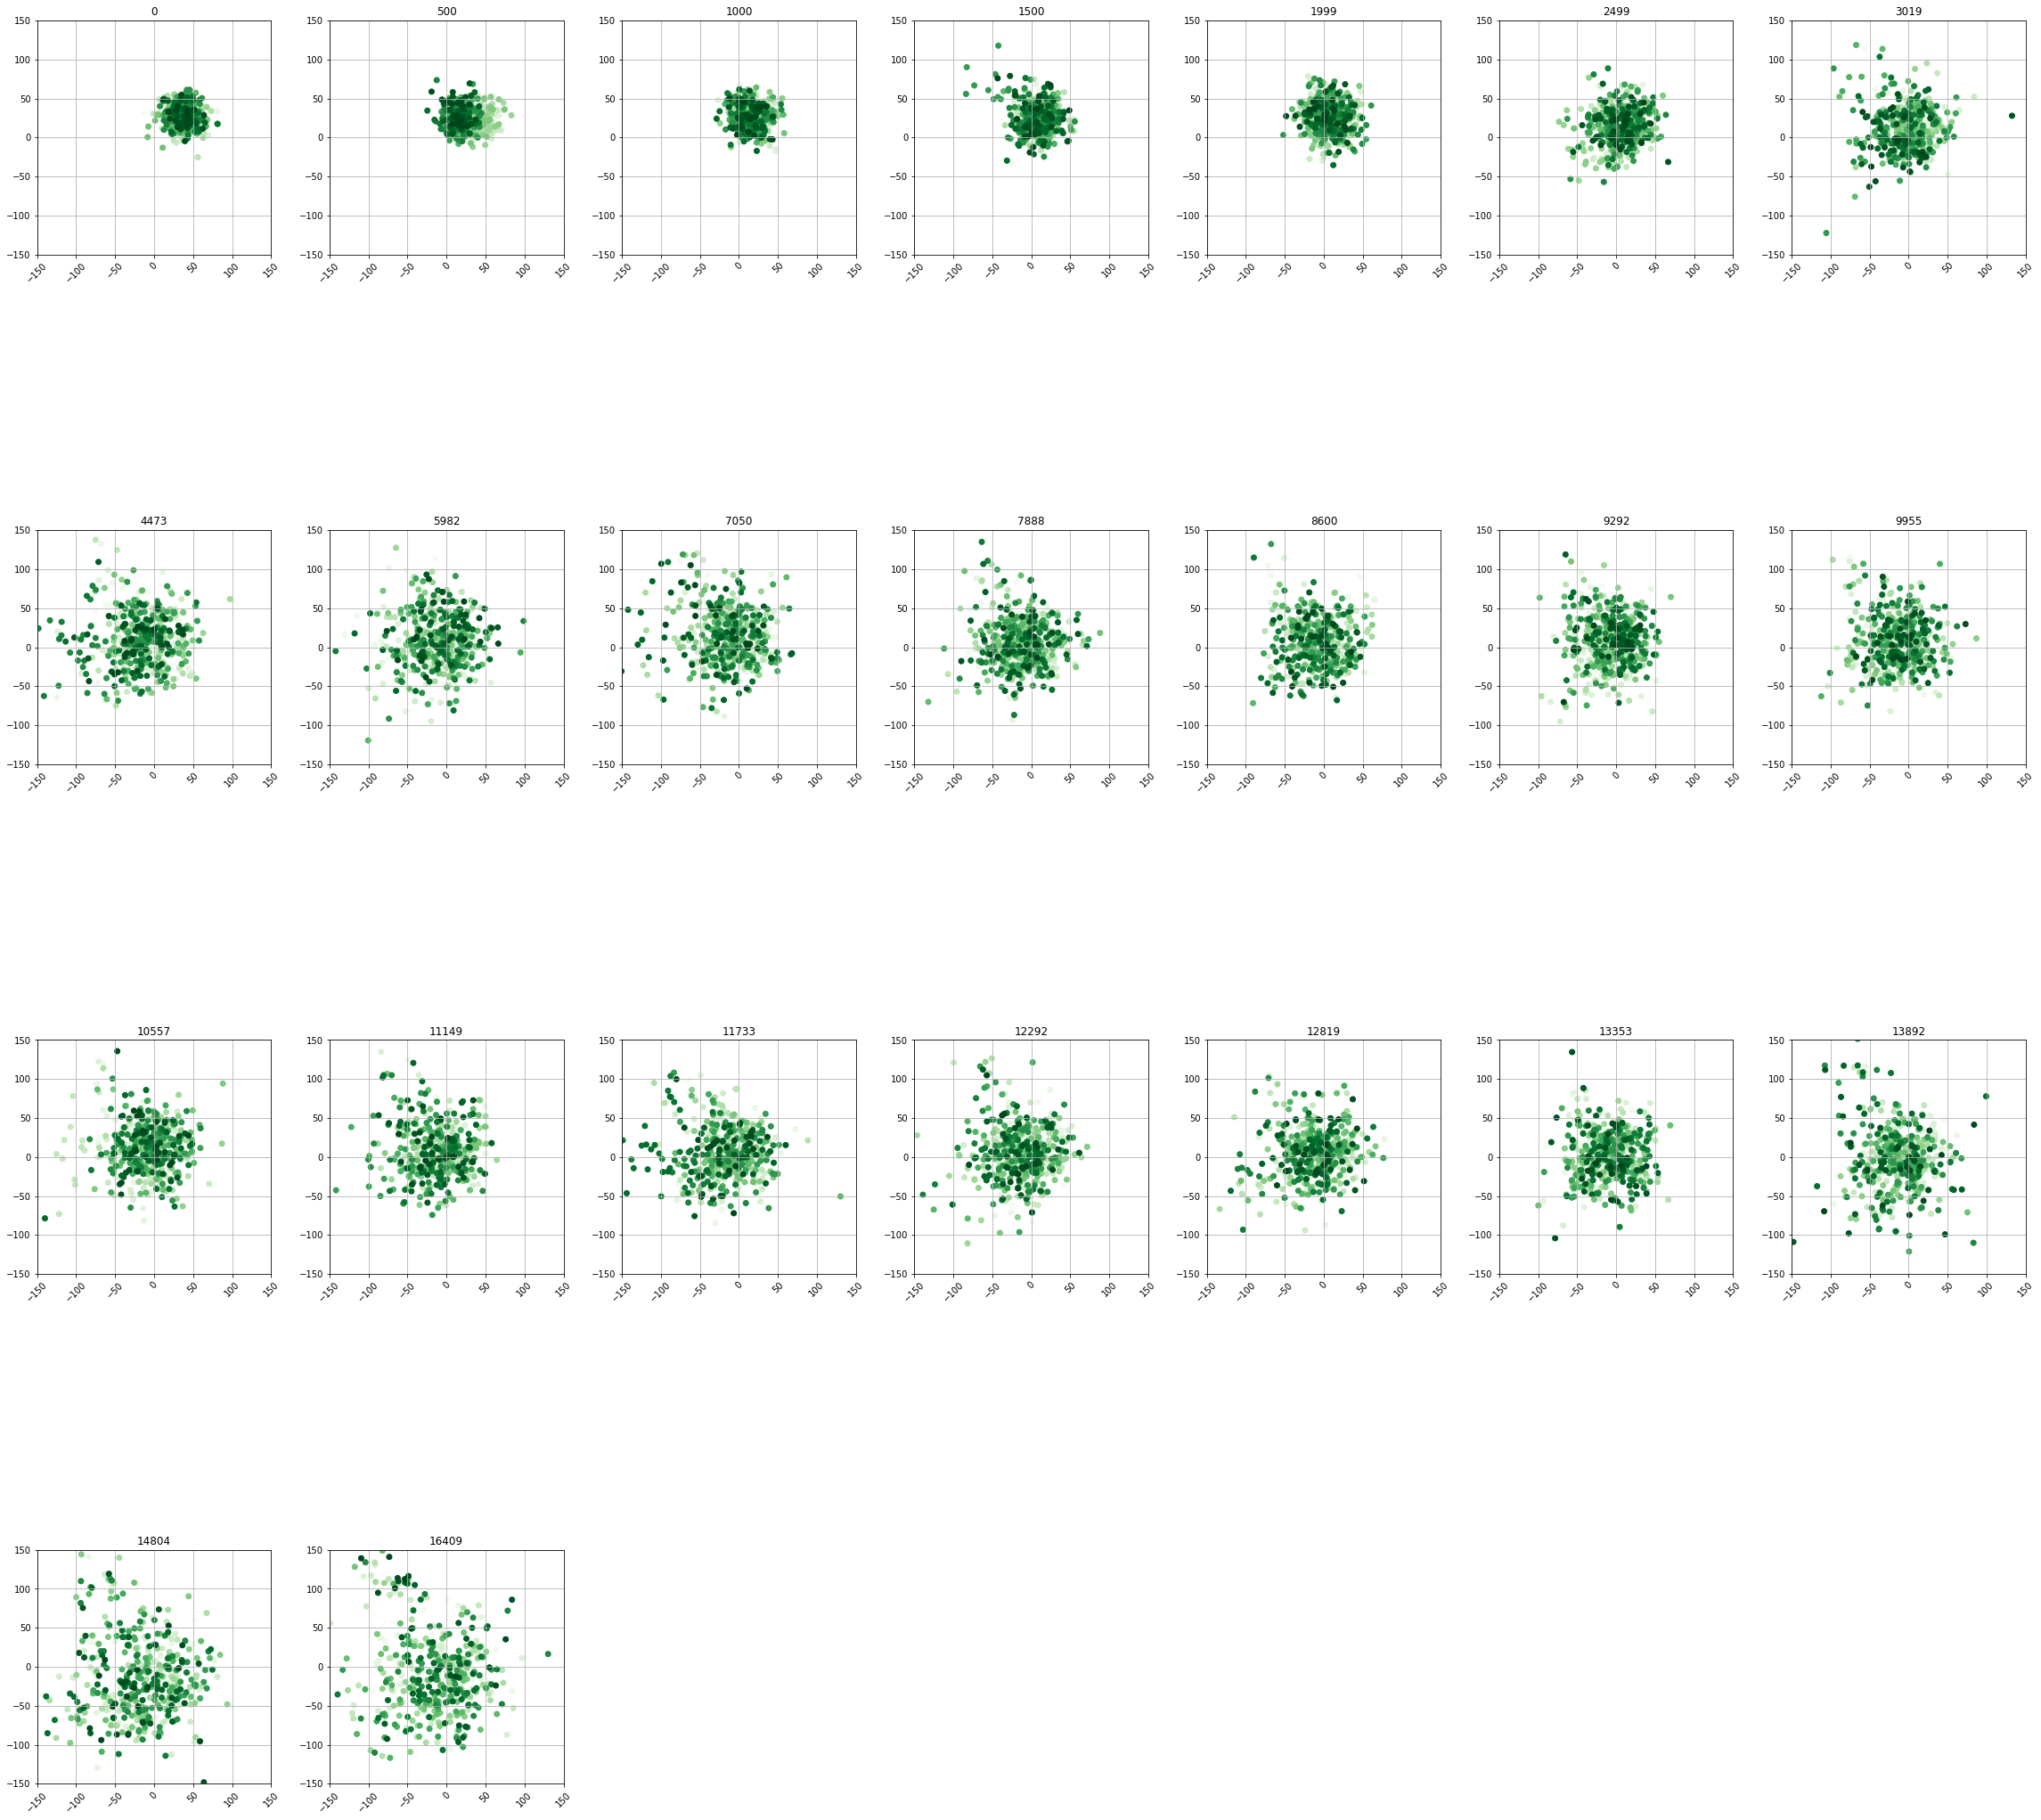

Selected Range: 2001 to 10000 
Selected Index Range: 0 to 7999 
I have saved which folders have passed as datatable OrbitBiotin500Hz100Lz_1k_00003_trimmed.csv 
and I have stored them here: trimmed_csv


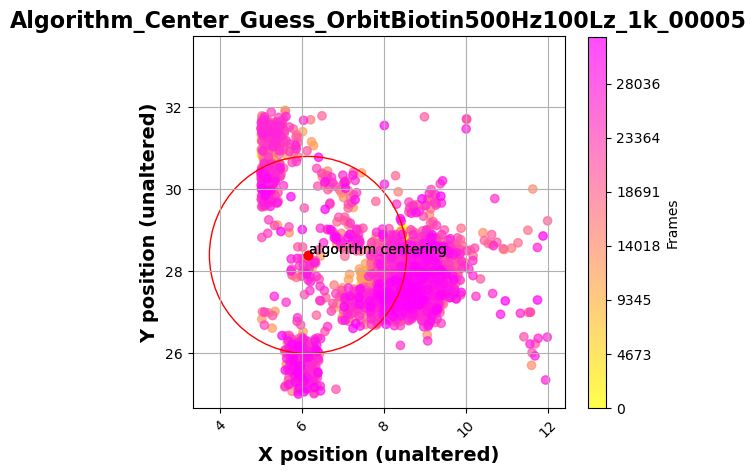

The center is (6.139863393744644, 28.396832719141123)
If the center is satisfactory, change the find_center_coordinates parameter to no
If the center is unsatisfactory, adjust the frame_start and frame_end parameters and try again


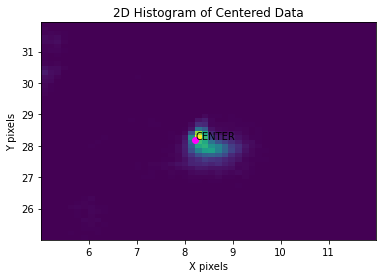

number of plots: 35


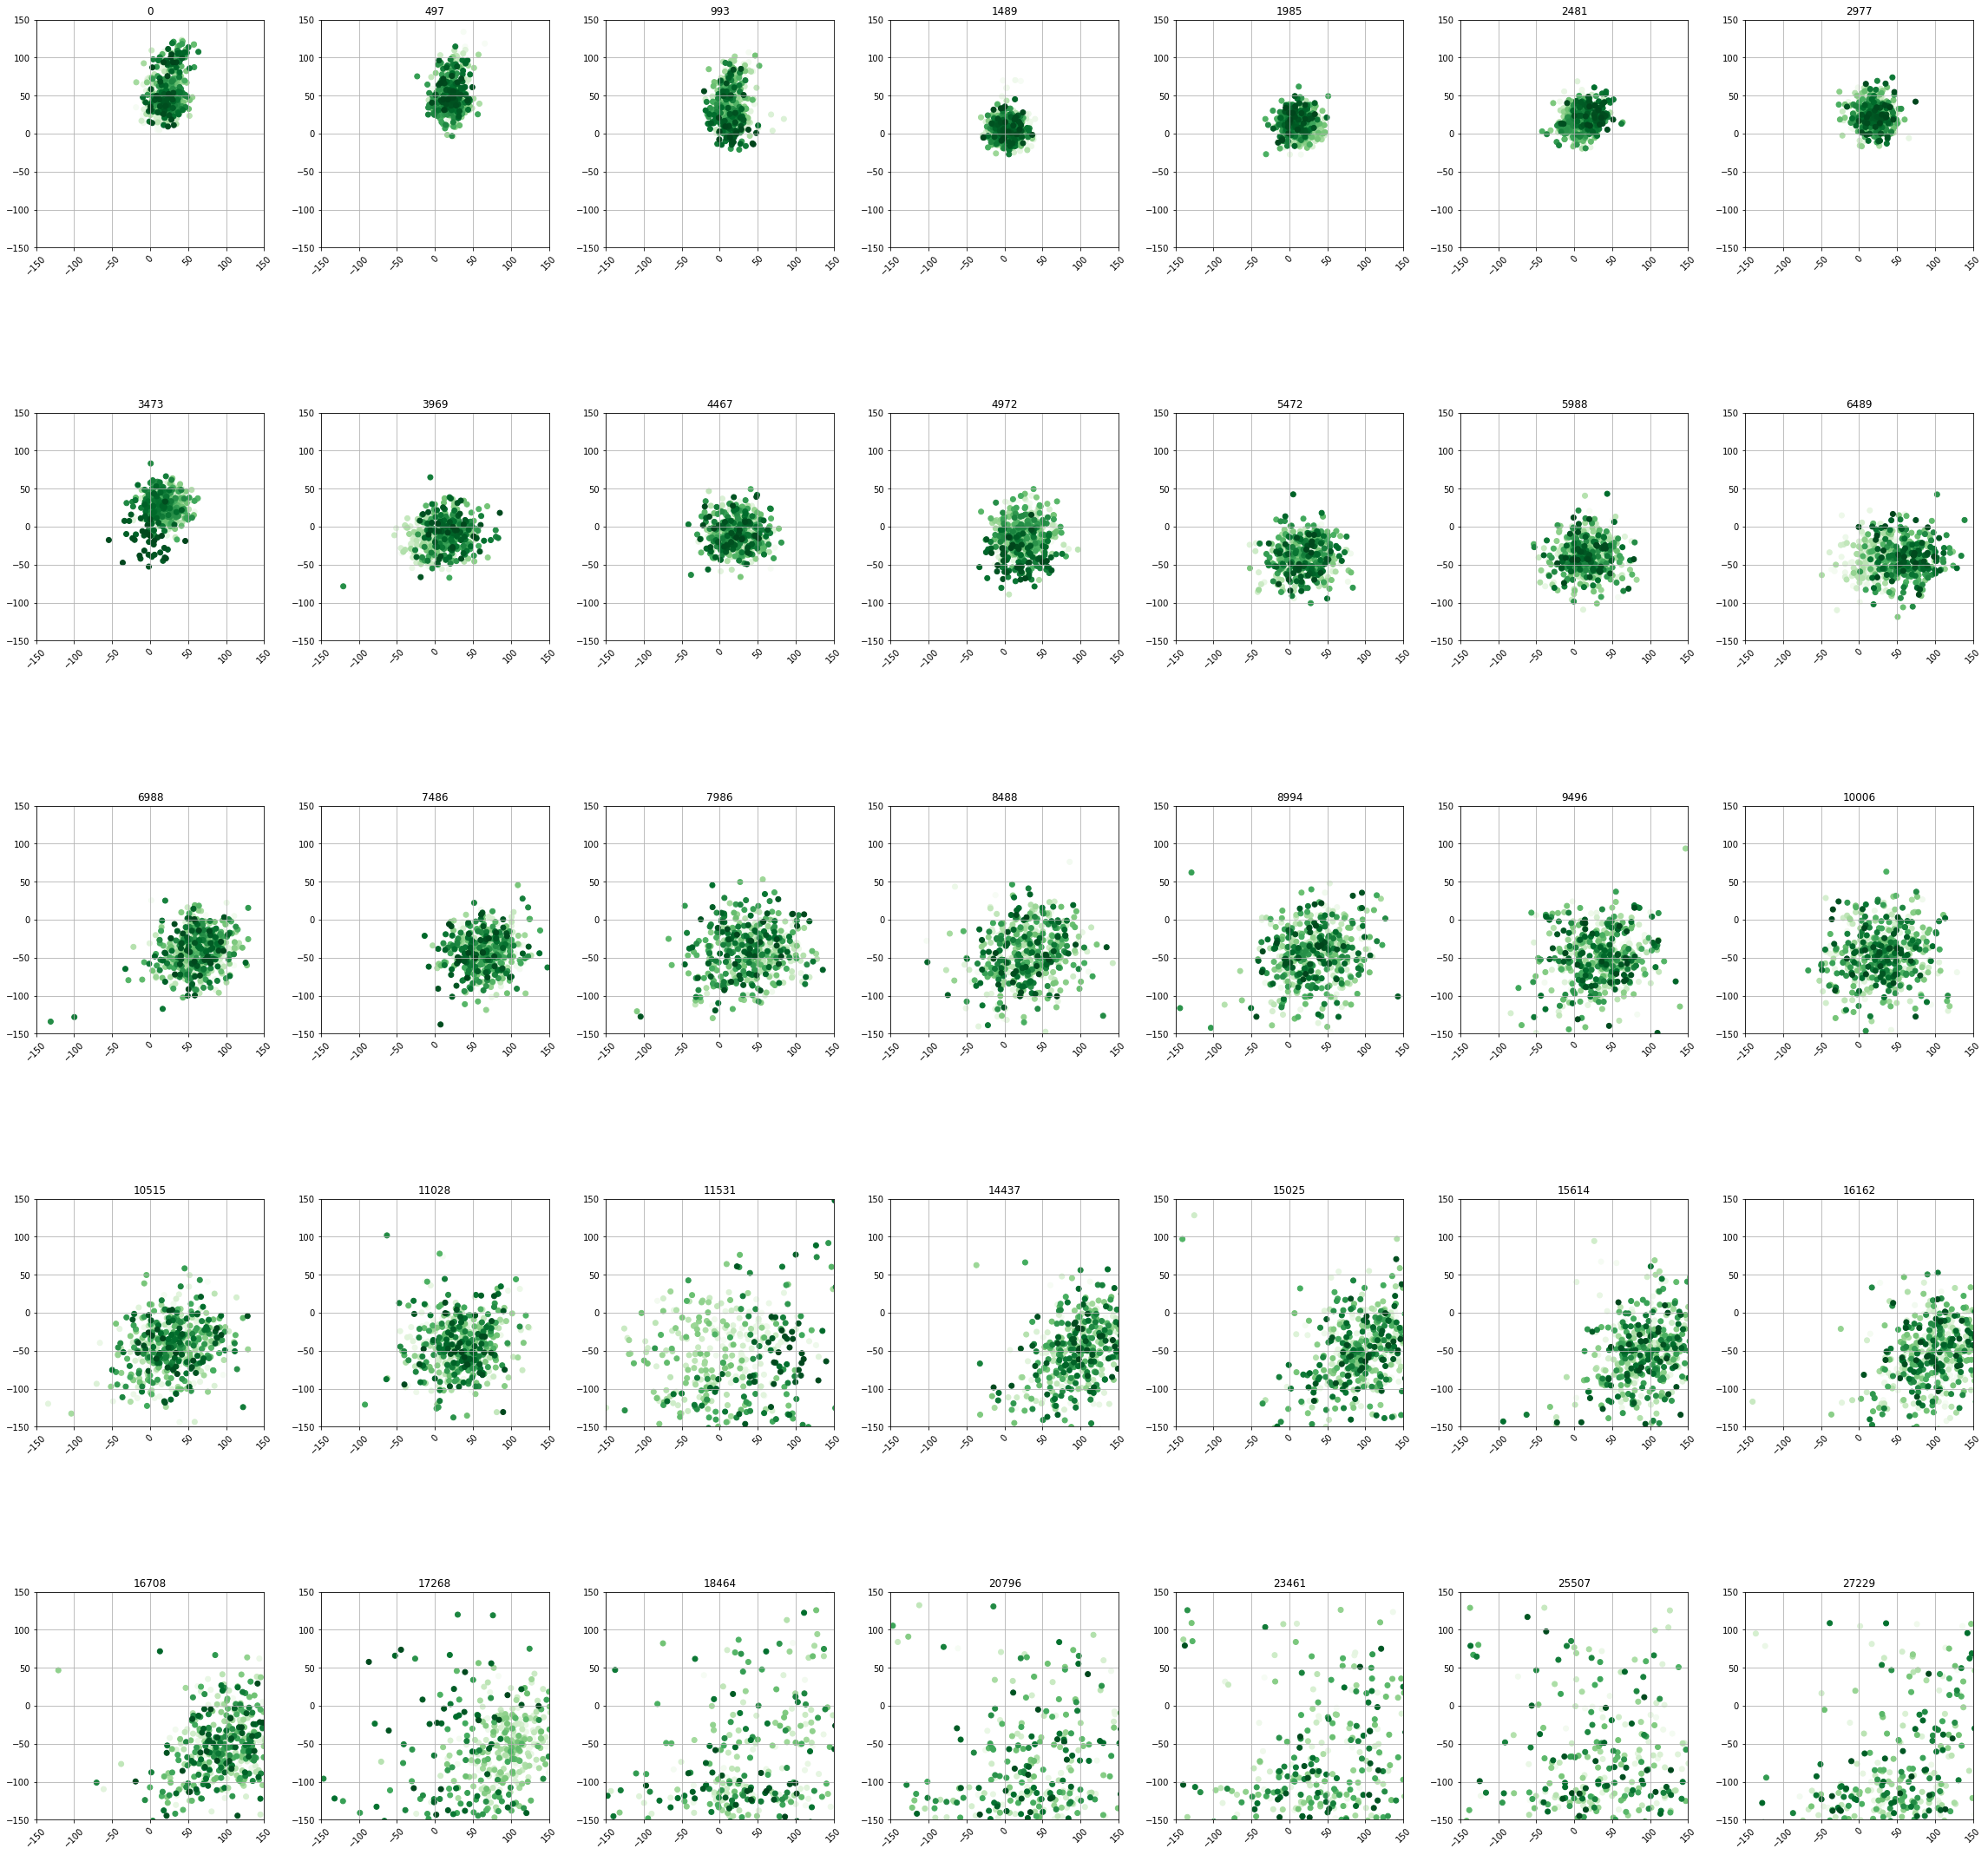

In [4]:
# Create a for loop to run over a folder of csv's of .csv trajectories that meet the following criterion:
# 1) filtered so that the relevant angular range is defined 

# to iterate over a folder you need all the files of the folder first

#Change the folder directory to be the current folder's 
os.chdir(folder_name)

#Take all files in the current folder(the one we just switched to) and store it in a list through which we will iterate
my_files = os.listdir(os.getcwd())

# get current path
path_OG = os.getcwd()

# create saving path 

print("How would you like your output?\n")
output_type = input("Enter Normal (n) or downsampled (ds):")

#create a new folder  ############################################################# change the name of the folder that has all the trimmed data
saving_folder = "trimmed_csv"


# if the folder does not exist already
if not os.path.exists(saving_folder):
    # make a folder in the current path
    os.mkdir(saving_folder)
    # and report this to the user
    print("Directory ", saving_folder,  " Created ")
else:
    # else tell user it exists already
    print("Directory ", saving_folder,  " already exists")
    
my_saving_path = os.path.join(path_OG, saving_folder)


#Intialize counter
counter = 0

##### preallocate summary dataframe  [file_name, startframe, endframe]
csv_files = list(filter(lambda f: f.endswith('.csv'), my_files))
zero_cols = np.zeros((len(csv_files),2))
zero_cols = pd.DataFrame(zero_cols)
sum_df = pd.DataFrame(csv_files)
sum_df = pd.concat([sum_df, zero_cols], axis=1)
sum_df.columns = ["file_name","start_frame","end_frame"]



################### START FOR LOOP

for file_name in my_files:
    if '.csv' in file_name:
        pk = os.path.splitext(file_name)[0]
        exp_tag = "OrbitBiotin500Hz100Lz_1k" + "_" + pk
        #run DORA.find_center
        initial_parameters = [file_name, time_step, frame_start, frame_end, cmap, exp_tag, first_zero_end, graph_centers, save_plot]
        center, data, ind_invalid_reading, data_back, my_rad_estimate = DORA.find_center(*initial_parameters)

        #prompt user for estimated center
        # NEW CENTERING ALGORITHM WITH LOW RES HIST

        #section x and y data
        x = data["X position"]
        y = data["Y position"]

        # select arbitrary bin value:
        bin_num = 50

        center_OR = find_center_hist_max(x, y, bin_num)


        # run DORA.downsampling
        downsample_parameters = [bin_size, processing, data, center_OR, time_step, pixel_size, frame_start, frame_end]
        down_sampled_df = DORA.downsample(*downsample_parameters)
        
        # run DORA.graph --> Grid graph
        
        #intialize parameters for grid graph
        #Grid Parameters
        grid_parameters = [file_name, down_sampled_df, plot_type, display_center, exp_tag, x_axis_label, y_axis_label, z_axis_label, unit, 
        pixel_min, pixel_max, axis_increment_nm, axis_increment_pixel, nm_min, nm_max, save_plot, frame_start, frame_end, time_step,cmap,exp_tag, 
        frames_per_plot, columns, fig_size_x, fig_size_y]

        DORA.graph(plot_type, *grid_parameters)
        

        # collect frame range
        keep_frame = input("Do you want to continue analyzing this peak? Enter (y/n): ")

        if keep_frame == "y":
            frame_start_input_OG = input("Enter the starting frame: ")
            frame_start_input_OG = int(frame_start_input_OG)
            frame_end_input_OG = input("Enter the ending frame: ")
            frame_end_input_OG = int(frame_end_input_OG)
            print(f"Selected Range: {frame_start_input_OG} to {frame_end_input_OG} ")
            
            #Truncate data to fit new range:
            
            #adjust frames into indices 
            frame_start_input = frame_start_input_OG - frame_start_input_OG 
            frame_end_input = frame_end_input_OG  - frame_start_input_OG 
            print(f"Selected Index Range: {frame_start_input} to {frame_end_input} ")
            
            #Truncate the data according to output type: 

            if output_type == "ds":

                # print(down_sampled_df.index)
                df =  down_sampled_df.iloc[frame_start_input:frame_end_input,:]
                # print (df.index)
                
                #Create a CSV of the Dataframe that shows which pk's passed the test
                my_title = exp_tag +"_trimmed" + ".csv"
                my_saving_path_title = os.path.join(path_OG, saving_folder, my_title)
                df.to_csv(my_saving_path_title, header=False, index=False)
                print(f"I have saved which folders have passed as datatable {my_title} ")
                print(f"and I have stored them here: {saving_folder}")

            else:

                # print(down_sampled_df.index)
                df =  down_sampled_df.iloc[frame_start_input:frame_end_input,:]
                df = df.iloc[:,[1,2,3]] # only export X,Y, and intensities
                # print (df.index)
                
                #Create a CSV of the Dataframe that shows which pk's passed the test
                my_title =  exp_tag +"_trimmed" + ".csv"
                my_saving_path_title = os.path.join(path_OG, saving_folder, my_title)
                df.to_csv(my_saving_path_title, header=False, index=False)
                print(f"I have saved which folders have passed as datatable {my_title} ")
                print(f"and I have stored them here: {saving_folder}")
        else: 
            frame_start_input_OG = np.nan
            frame_end_input_OG = np.nan



        # add start frame and end frame
        sum_df.iloc[counter,1] = frame_start_input_OG
        sum_df.iloc[counter,2] = frame_end_input_OG

        df.to_csv(my_saving_path_title, header=False, index=False)
            
        counter += 1
        # #report filename has been collected
        # print(f"I have stored the radius of {file_name}")

In [7]:
### sum_df is underconstruction!

sum_df


,file_name,start_frame,end_frame
0,00001.csv,1.0,1.0
1,00003.csv,2001.0,10000.0
2,00005.csv,NaN,NaN
